# This notebook implements the software program: fragments_from_footprinting
Author: Ariana Brenner Clerkin <br>
Date: 2 March 2023

Load appropriate modules

In [1]:
import fragments_from_footprinting as ff

In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

In [3]:
# import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
#                                'Lucida Grande', 'Verdana']
import matplotlib.pyplot as plt

In [ ]:
# Autosave this each time

In [ ]:
example_cp = ff.generate_cleav_prob()

In [ ]:
attempted, actual = ff.get_breaks_to_try(example_cp)

In [ ]:
actual

In [ ]:
1/150. * len(example_cp)

In [ ]:

fraglens, mids = ff.get_fld(cleavage_prob=example_cp, trials = 100, break_rate = 150)

In [ ]:
frags_and_mids = pd.DataFrame({'frag_len': fraglens,
                      'midpoints': mids})
# Autosave this each time
frags_and_mids

In [ ]:
plt.hist(fraglens, bins = 100)

In [ ]:
min_range = -1200
max_range = 1200
midpt_bin_width = 10.
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/midpt_bin_width)))
bin_labels = bin_boundaries[:-1]

In [ ]:
frags_and_mids['bin_mins'] = pd.cut(frags_and_mids['midpoints'], bins=bin_boundaries, labels=bin_labels)
frags_and_mids_subset = frags_and_mids[frags_and_mids['bin_mins'] > 0.0]

In [ ]:
frags_and_mids

In [ ]:
data_fold = '/ru-auth/local/home/abrenner/myscratch/temp_footprint/'
frags_and_mids = pd.read_csv(data_fold + "fragment_lens_and_locations.csv")

In [ ]:
max_y_bin = 1000
min_y = 0#50
data_for_hist = frags_and_mids[frags_and_mids.frag_len<max_y_bin].frag_len
stored_histogram = sns.histplot(data=data_for_hist, binwidth=10, stat= 'probability')
plt.title('Fragment Length Distribution')
plt.xlabel('Fragment Length (nt)')
plt.tight_layout()
plt.savefig(data_fold + 'fld.pdf')
plt.show()

In [ ]:
# min_y_range = 0.#50.
# max_y_range = 1000.
# bp_per_bin = 5.
# bin_y_boundaries = list(np.linspace(min_y_range,max_y_range, 1+int((max_y_range-min_y_range)/bp_per_bin)))
# bin_labels = frags_and_mids['bin_mins'].unique()
# # v_plot_empty = np.zeros((len(bin_labels),len(bins[:-1])))
# v_plot_empty = np.zeros((len(bin_labels),len(bin_y_boundaries[:-1])))
# np.shape(v_plot_empty)

# v_plot_empty

# # Iterate through x-bins and grab FLDs per bin
# for i in range(0,np.shape(v_plot_empty)[0]):
#     flds_per_bin = np.array(frags_and_mids[frags_and_mids['bin_mins']==bin_labels[i]].frag_len)
#     print(flds_per_bin)
#     bin_heights, bins, patches = plt.hist(flds_per_bin, bins = bin_y_boundaries);
#     #flipped so it plots in the right order
#     v_plot_empty[i] = np.flip(bin_heights)

In [ ]:
# im = ax[1].imshow(v_plot_empty.T, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

In [ ]:
hist2d = sns.histplot(frags_and_mids, x="midpoints", y="frag_len", color = "red", binwidth=(10, 10), cbar=True)

In [ ]:
hist2d = sns.heatmap(frags_and_mids, x="midpoints", y="frag_len", color = "red", binwidth=(10, 10), cbar=True)

In [ ]:
min_range = -1200#50.
max_range = 1200

min_y_range = 0.#50.
max_y_range = 1000.

fig, ax = plt.subplots(2,1,figsize = (7,6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
midpoint = len(example_cp)/2
cleavage = ax[0].plot(range(min_range, max_range), example_cp[min_range+midpoint:max_range+midpoint], linewidth=3)
ax[0].set_ylabel('Cleavage \n Prob.')
ax[0].set_xlim((min_range,max_range))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
im = sns.displot(frags_and_mids, x="midpoints", y="frag_len", color = "red", binwidth=(10, 10), cbar=True)
ax[1].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
ax[1].set_ylabel('Fragment \n Length (nt)')
plt.tight_layout()

In [ ]:
data = sns.facet_data()

In [ ]:
# hist2d.figure

for ax in hist2d.axes.flat:
    print (ax.lines)
    for line in ax.lines:
        print (line.get_data())
        print (line.get_data())

In [ ]:
cp

In [ ]:
matrix, arr2, a ,b= plt.hist2d(x=frags_and_mids["midpoints"], y=frags_and_mids["frag_len"], bins=[1200,100])#, color = "red", binwidth=(10, 10), cbar=True)

In [ ]:
np.shape(matrix)

a = matrix
row_sums = a.sum(axis=1)
new_matrix = a / row_sums[:, np.newaxis]

In [ ]:
im = plt.imshow(matrix.T, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

# try with bigger data

In [ ]:
intermed_data = '/ru-auth/local/home/abrenner/myscratch/intermed_data/footprinting/vplot_input_'

In [ ]:
all_fraglens_dyad_1_0_ld = np.load(intermed_data+'fraglens_simple_dyad.npy')
all_mids = np.load(intermed_data+'simple_dyad_midpoints.npy')

In [ ]:
frags_and_mids = pd.DataFrame({'frag_len': all_fraglens_dyad_1_0_ld[0],
                      'midpoints': all_mids[0]})#-midpoint})

In [ ]:
min_range = -1200
max_range = 1200
midpt_bin_width = 10.
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/midpt_bin_width)))
bin_labels = bin_boundaries[:-1]

min_y_range = 0.#50.
max_y_range = 1000.
bp_per_bin = 5.
bin_y_boundaries = list(np.linspace(min_y_range,max_y_range, 1+int((max_y_range-min_y_range)/bp_per_bin)))

In [ ]:
matrix, arr2, a ,b= plt.hist2d(x=frags_and_mids["midpoints"], y=frags_and_mids["frag_len"], bins=[len(bin_labels),len(bin_y_boundaries[:-1])])#, color = "red", binwidth=(10, 10), cbar=True)
im = plt.imshow(matrix.T, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

In [ ]:
np.shape(matrix)

In [ ]:
frags_and_mids_new = frags_and_mids[(frags_and_mids.frag_len < 1000) & (np.abs(frags_and_mids.midpoints) < 1200)]

In [ ]:
min_range = -1200
max_range = 1200
midpt_bin_width = 10.
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/midpt_bin_width)))
bin_labels = bin_boundaries[:-1]
vplot_arr, _, _ , _= plt.hist2d(x=frags_and_mids_new["midpoints"], y=frags_and_mids_new["frag_len"], bins=[len(bin_labels),len(bin_y_boundaries[:-1])])#, color = "red", binwidth=(10, 10), cbar=True)

In [ ]:
plt.hist(a)

In [ ]:
# m2 = type(np.asmatrix(matrix))
mat_to_plot = np.flip(matrix)
im = plt.imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

In [ ]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 14
#Need to change color of null values, no values <50bp
# current_cmap = matplotlib.cm.get_cmap()
# current_cmap.set_bad(color='red') # set nulls as black
fig, ax = plt.subplots(2,1,figsize = (7,6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
# cleavage = ax[0].plot(range(min_range, max_range), cleav_dyad_1_0_1[min_range+midpoint:max_range+midpoint], linewidth=3)
ax[0].set_ylabel('Cleavage \n Prob.')
ax[0].set_xlim((min_range,max_range))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
im = ax[1].imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])
ax[1].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
ax[1].set_ylabel('Fragment \n Length (nt)')
plt.tight_layout()

In [ ]:
tdf = '/ru-auth/local/home/abrenner/myscratch/temp_footprint/'

In [ ]:
min_range = -1200
max_range = 1200
min_y_range = 0.#50.
max_y_range = 1000.

matrix = np.load(tdf+'vplot_arr.npy')
# m2 = type(np.asmatrix(matrix))
mat_to_plot = np.flip(matrix.T)
im = plt.imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

In [ ]:
np.max(matrix)

In [ ]:
from sklearn import preprocessing

In [ ]:
# min_max_normalize to use full color bar
min_max_scaler = preprocessing.MinMaxScaler()
v = mat_to_plot
v_scaled = min_max_scaler.fit_transform(v)
mat_to_plot = v_scaled

In [ ]:
mat_to_plot

In [ ]:
fig, ax = plt.subplots(figsize = (7,6))#, gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
im = plt.imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

cbar_ax = fig.add_axes([0.9, 0.22, 0.025, 0.33])
cbar = fig.colorbar(im, ax=ax, cax=cbar_ax)#shrink=0.35)
cbar.set_label('Min-Max Normalized Counts')

## Plot 

In [ ]:
import matplotlib as mpl

In [ ]:
# a = v_plot_empty.T
# vplot_norm = a/np.sum(a)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 14

midpoint = len(example_cp)/2

fig, ax = plt.subplots(2,1,figsize = (9,6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
cp_to_plot = example_cp[int(min_range)+int(midpoint):int(max_range)+int(midpoint)]
ax[0].plot(np.linspace(min_range, max_range, len(cp_to_plot)),cp_to_plot)#, linewidth=3)
# cleavage = 
ax[0].set_ylabel('Cleavage \n Prob.')
ax[0].set_xlim((min_range,max_range))
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
im = ax[1].imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])
ax[1].set_xlabel('Distance from Fiber Midpoint to Fragment Center (nt)')
ax[1].set_ylabel('Fragment \n Length (nt)')
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# cax = fig.add_axes([ax[1].get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.22, 0.025, 0.33])
cbar = fig.colorbar(im, ax=ax[1], cax=cbar_ax)#shrink=0.35)
cbar.set_label('Count Density')
# plt.tight_layout()

plt.savefig(data_fold+'temp.pdf')

In [ ]:
len(example_cp[int(min_range)+int(midpoint):int(max_range)+int(midpoint)])

In [ ]:
len(cp_to_plot)

# Test vplot_data function

In [ ]:
example_cp = ff.generate_cleav_prob()
intermed_data = '/ru-auth/local/home/abrenner/myscratch/intermed_data/footprinting/vplot_input_'
all_fraglens_dyad_1_0_ld = np.load(intermed_data+'fraglens_simple_dyad.npy')
all_mids = np.load(intermed_data+'simple_dyad_midpoints.npy')
frags_and_mids = pd.DataFrame({'frag_len': all_fraglens_dyad_1_0_ld[0],
                      'midpoints': all_mids[0]})#-midpoint})
vp_data = ff.vplot_data(frags_and_mids)

In [ ]:
np.shape(vp_data)

In [ ]:
int(7.)/2.

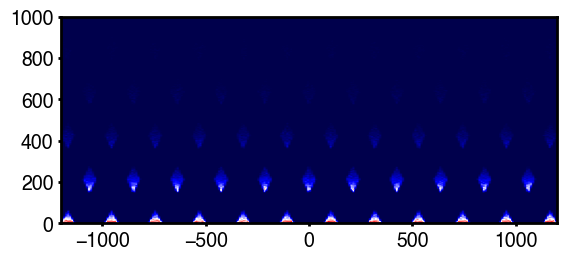

In [15]:
min_range = -1200
max_range = 1200
min_y_range = 0.#50.
max_y_range = 1000.
matrix = np.load('vplot_arr.npy')
mat_to_plot = np.flip(vp_data.T)
im = plt.imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range])

In [ ]:
ff.nrl*ff.num_nucs+ff.link_len

In [ ]:
len(example_cp)/2

In [ ]:
midpoint = len(example_cp)/2

# All together now

In [4]:
data_fold = '/ru-auth/local/home/abrenner/myscratch/temp_footprint/'

In [5]:
cd /ru-auth/local/home/abrenner/myscratch/temp_footprint/

/lustre/fs4/risc_lab/scratch/abrenner/temp_footprint


In [6]:
pwd

'/lustre/fs4/risc_lab/scratch/abrenner/temp_footprint'

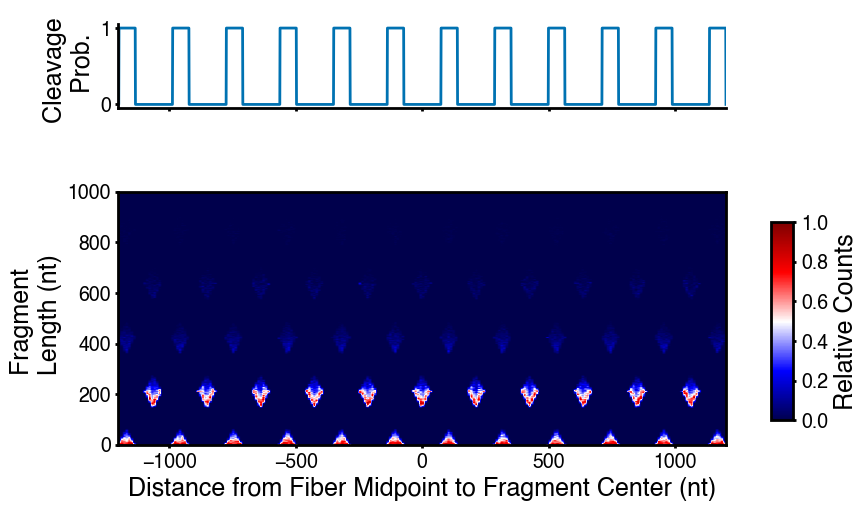

In [7]:
cp = ff.generate_cleav_prob()
frag_lens_all_trials, midpts_all_trials = ff.get_fld(cp)
fm = ff.frag_mid_df(frag_lens_all_trials, midpts_all_trials)
vp_data = ff.vplot_data(fm)
ff.plot_vplot(vp_data)

In [ ]:
dist_from_center = 300
max_frag = 500
bin_locs=10
bin_lens = 1
midpt = int(len(cp)/2)
fm['relative_mid'] = fm.midpoints - midpt
fm_sub = fm[(fm.frag_len < max_frag) & (np.abs(fm.relative_mid) < dist_from_center)]
min_range = -1. * dist_from_center
max_range = dist_from_center
    # midpt_bin_width = 10.
bin_boundaries = list(np.linspace(min_range,max_range, 1+int((max_range-min_range)/bin_locs)))
bin_labels = bin_boundaries[:-1]
min_frag = 0.
bin_len_boundaries = list(np.linspace(min_frag,max_frag, 1+int((max_frag-min_frag)/bin_lens)))
    
    
plt.hist2d(x=fm_sub["relative_mid"], y=fm_sub["frag_len"], bins=[len(bin_labels),len(bin_len_boundaries[:-1])])

In [ ]:
fm

In [ ]:
# max_y_bin = 1000
# min_y = 0#50
# data_for_hist = frags_and_mids[frags_and_mids.frag_len<max_y_bin].frag_len
# stored_histogram = sns.histplot(data=frag_lens_all_trials, binwidth=10, stat= 'probability')
# plt.title('Fragment Length Distribution')
# plt.xlabel('Fragment Length (nt)')
# plt.tight_layout()
# # plt.savefig(data_fold + 'fld.pdf')
# plt.show()

In [ ]:
ff.plot_fld()

In [ ]:
#     frag_lens = np.load('frag_lens.npy') # TO DO write if statement if the file does not exist.

fig, ax = plt.subplots(2,2,figsize = (11,6), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [9, 2]}, sharex=True)
max_fragment = 1000
# data_for_hist = pd.DataFrame(fm[fm.frag_len<max_y_bin].frag_len)
frag_lens_sub = frag_lens_all_trials[frag_lens_all_trials<max_fragment]
data_for_hist = pd.DataFrame({'frag_len':frag_lens_sub})
sns.histplot(data=data_for_hist, y = 'frag_len', bins=100, stat= 'probability')#, element="poly")
plt.title('Fragment Length Distribution')
plt.ylabel('Fragment Length (nt)')
plt.tight_layout()
#     plt.savefig('fld.pdf')
plt.show() 

In [ ]:
frag_lens_all_trials[frag_lens_all_trials<20]

In [ ]:
# a = v_plot_empty.T
# vplot_norm = a/np.sum(a)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 14

midpoint = len(cp)/2

fig, (ax1, ax2) = plt.subplots(2,2,figsize = (11,6), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [9, 2]})#, sharex=True, sharey=True)
cp_to_plot = cp[int(min_range)+int(midpoint):int(max_range)+int(midpoint)]
ax1[0].plot(np.linspace(min_range, max_range, len(cp_to_plot)),cp_to_plot)#, linewidth=3)
# cleavage = 
ax1[0].set_ylabel('Cleavage \n Prob.')
ax1[0].set_xlim((min_range,max_range))

# Get rid of unwanted axes
ax1[0].spines['right'].set_visible(False)
ax1[0].spines['top'].set_visible(False)
ax2[1].spines['right'].set_visible(False)
ax2[1].spines['top'].set_visible(False)

#Clear top right plot
ax1[1].clear()
ax1[1].axis("off")
ax1[1].set_visible(False)
ax1[1].remove()

im = ax2[0].imshow(mat_to_plot, cmap='seismic', extent = [min_range, max_range, min_y_range, max_y_range], aspect=1)
ax2[0].set_xlabel('Distance from Fiber Midpoint to Fragment Center (nt)')
ax2[0].set_ylabel('Fragment \n Length (nt)')
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.22, 0.025, 0.33])
cbar = fig.colorbar(im, ax=ax2[0], cax=cbar_ax)#shrink=0.35)
cbar.set_label('Count Density')

# Set shared axes
ax1[0].sharex(ax2[0])
ax2[1].sharey(ax2[0])

# asp = np.diff(ax2[1].get_xlim())[0] / np.diff(ax2[1].get_xlim())[0]
# ax2[1].set_aspect(asp)
# asp = np.diff(ax2[1].get_xlim())[0] / np.diff(ax2[1].get_ylim())[0]
# asp /= np.abs(np.diff(ax2[0].get_xlim())[0] / np.diff(ax2[0].get_ylim())[0])
# ax2[1].set_aspect(asp)

# Got scaled value by guessing and checking.
ax2[1].set_box_aspect(1.875)

ax2[1].set_ylabel(' ')
sns.histplot(data=data_for_hist, y = 'frag_len', bins=100, stat= 'probability', ax=ax2[1])#, element="poly")
# plt.tight_layout()

# plt.savefig(data_fold+'temp.pdf')